In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('./datasets/weather.csv')

## Weather Dataset

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. We provide you with the dataset from NOAA of the weather conditions of 2007 to 2014, during the months of the tests. 

Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level

Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

![alt text](Chicago-Weather.png "Title")


### How does weather affect the west nile virus?

Weather factors are important drivers of WNV transmission due to their direct effect in mosquito biology.

* According to [study drivers of West Nile virus human illness in the Chicago](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0227160)
    * higher than normal average annual temperatures are associated with an increased likelihood of higher WNV disease incidence
    * higher than normal precipitation was positively associated with higher human WNV cases in the eastern region of the United States, but this relationship was reversed for the western region
    * Another study identified drought as an important driver of WNV epidemics in the United States
    * hot weather conditions, warm winters, and higher MIR in earlier weeks increased the probability of an area of having a WNV human case.

### How is the weather Data segmented?
* Temperature
    * Tmax / Tmin / Tavg / Depart / Dewpoint / Wetbulb
* Degree Days
    * Heat / Cool / Sunrise / Sunset
* Significant Weather Types
    * Code Sum
* Snow / Ice
    * Depth / Water1
* Precipitation
    * Snowfall / PrecipTotal
* Pressure
    * StnPressure / SeaLevel
* Wind
    * ResultSpeed / ResultDir / AvgSpeed

In [3]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

### EDA on Temperature

#### Impute Missing values in Tavg

In [5]:
# Check for missing values in Tavg
weather.loc[weather['Tavg']=='M']

# Impute missing values with average of Tmax & Tmin
weather['Tavg'] = weather.apply(lambda row: (row['Tmax'] + row['Tmin']) / 2 if row['Tavg']=='M' else row['Tavg'], axis=1)

# Change type for Tavg to int
weather['Tavg'] = weather['Tavg'].astype(int)

#### Impute Missing values in WetBulb

In [6]:
# Check for missing values in wetbulb
weather.loc[weather['WetBulb']=='M']

# Impute missing values with Dewpoint Values
weather['WetBulb'] = weather.apply(lambda row: row['DewPoint'] if row['WetBulb']=='M' else row['WetBulb'], axis=1)

# Change type for Wetbulb to int
weather['WetBulb'] = weather['WetBulb'].astype(int)

#### Correlation between Temperature Data

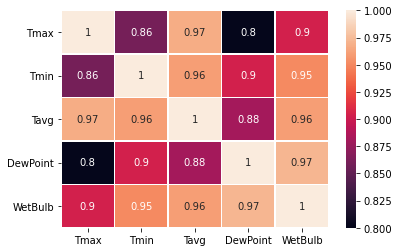

In [7]:
sns.heatmap(
    weather[['Tmax','Tmin','Tavg','Depart','DewPoint','WetBulb']].corr(),
    annot=True,
    linewidth=0.5,
    vmax=1,
    vmin=0.8
);

**Observation**  
Correlation between DewPoint and WetBulb is almost perfect at 0.97.
By definition, both is a measure of humidity, but the difference between the two is:
 * DewPoint is the temperature to which we should cool the air to saturate the air with water vapour
 * WetBulb is the temperature that we can get from a moistened thermometer bulb that is exposed to air flow

Thus we will use DewPoint as a measure of humidity and drop WetBulb

In [8]:
# Drop WetBulb
weather.drop('WetBulb',axis=1, inplace=True)

In [9]:
# Drop Depart
weather.drop('Depart',axis=1, inplace=True)

### EDA on Degree Days

In [10]:
print(weather['Cool'].unique())
print('')
print(weather['Heat'].unique())
print('')
print(weather['Sunset'].unique())
print('')
print(weather['Sunrise'].unique())

[' 2' ' 3' ' 0' 'M' ' 5' ' 4' ' 6' ' 8' ' 7' ' 9' '10' '13' '11' '12' ' 1'
 '15' '16' '17' '14' '20' '19' '18' '21' '22' '24' '27' '23' '26' '28'
 '29' '25']

['0' '14' '13' '9' '7' 'M' '5' '6' '4' '10' '8' '12' '3' '2' '1' '15' '16'
 '19' '17' '20' '11' '18' '21' '25' '24' '27' '26' '23' '28' '22' '29']

['1849' '-' '1850' '1851' '1852' '1853' '1855' '1856' '1857' '1858' '1859'
 '1860' '1901' '1902' '1903' '1904' '1905' '1906' '1907' '1908' '1909'
 '1910' '1911' '1912' '1913' '1914' '1915' '1916' '1917' '1918' '1919'
 '1920' '1921' '1922' '1923' '1924' '1925' '1926' '1927' '1928' '1929'
 '1930' '1931' '1900' '1854' '1848' '1846' '1845' '1843' '1842' '1840'
 '1839' '1837' '1835' '1834' '1832' '1831' '1829' '1827' '1826' '1824'
 '1822' '1821' '1819' '1817' '1815' '1814' '1812' '1810' '1809' '1807'
 '1805' '1803' '1760' '1758' '1756' '1755' '1753' '1751' '1749' '1748'
 '1746' '1744' '1742' '1741' '1739' '1737' '1735' '1734' '1732' '1730'
 '1729' '1727' '1725' '1724' '1722' '1720' '1719' 

In [11]:
weather.loc[(weather['Cool']=='M') | (weather['Heat']=='M')]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,64,42,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66,68,M,M,-,-,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54,41,M,M,-,-,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,85,70,M,M,-,-,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78,51,M,M,-,-,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71,42,56,39,M,M,-,-,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,71,48,M,M,-,-,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,68,48,M,M,-,-,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62,44,M,M,-,-,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,63,43,M,M,-,-,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [12]:
weather.loc[(weather['Sunset']=='-') | (weather['Sunrise']=='-')]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2,2007-05-01,84,52,68,51,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,52,42,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,58,40,7,0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64,42,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60,39,5,0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,67,52,0,2,-,-,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57,40,8,0,-,-,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,45,34,20,0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45,35,20,0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5


In [13]:
weather.groupby('Heat')['Tavg'].mean().sort_values()

Heat
29    36.000000
28    37.000000
27    38.000000
26    39.000000
25    40.000000
24    41.000000
23    42.000000
22    43.000000
21    44.000000
20    45.000000
19    46.000000
18    47.000000
17    48.000000
16    49.000000
15    50.000000
14    51.000000
13    52.000000
12    53.000000
11    54.000000
10    55.000000
9     56.000000
8     57.000000
7     58.000000
6     59.000000
5     60.000000
4     61.000000
3     62.000000
2     63.000000
1     64.000000
M     66.727273
0     73.857219
Name: Tavg, dtype: float64

In [14]:
weather.groupby('Cool')['Tavg'].mean().sort_values()

Cool
 0    56.287707
 1    66.000000
M     66.727273
 2    67.000000
 3    68.000000
 4    69.000000
 5    70.000000
 6    71.000000
 7    72.000000
 8    73.000000
 9    74.000000
10    75.000000
11    76.000000
12    77.000000
13    78.000000
14    79.000000
15    80.000000
16    81.000000
17    82.000000
18    83.000000
19    84.000000
20    85.000000
21    86.000000
22    87.000000
23    88.000000
24    89.000000
25    90.000000
26    91.000000
27    92.000000
28    93.000000
29    94.000000
Name: Tavg, dtype: float64

**Observations**

Based on our grouping, the higher the temperature, the more heat is required, vice-versa

* Heat and Cool  are variables more relevant for calculating energy needs for electrical, natural gas, power, and heating, and air conditioning industries,  not as relevant to risk of mosquito breeding
* Sunrise and Sunset (Timings of sunrise and sunset unlikely affect mosquito breeding)

We will drop these values

In [15]:
weather.drop(columns=['Heat','Cool','Sunset','Sunrise'], axis=1, inplace=True)

## EDA on Code Sum

In [16]:
weather['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

**Observations**
Can consider using codes to represent weather conditions present
* Rain = TS / RA / DZ / SH 
* Snow = GR / SN / SG / GS / PL / IC
* Mist = FG / BR / UP 
* Dust = HZ / FU / VA / DU / DS / PO / SA / SS / PY / SQ / DR / BL

In [17]:
# Create features to represent weather
weather['Rain'] = weather.apply(lambda x: 1 if x['CodeSum'] in ('|'.join(['TS', 'RA', 'DZ', 'SH'])) else 0, axis=1)
weather['Snow'] = weather.apply(lambda x: 1 if x['CodeSum'] in ('|'.join(['GR', 'SN', 'SG', 'GS', 'PL','IC'])) else 0, axis=1)
weather['Mist'] = weather.apply(lambda x: 1 if x['CodeSum'] in ('|'.join(['FG','BR','UP'])) else 0, axis=1)
weather['Dust'] = weather.apply(lambda x: 1 if x['CodeSum'] in ('|'.join(['HZ','FU', 'VA', 'DU', 'DS','PO','SA','SS','PY','SQ','DR','BL'])) else 0, axis=1)
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rain,Snow,Mist,Dust
0,1,2007-05-01,83,50,67,51,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2,0,0,0,0
1,2,2007-05-01,84,52,68,51,,M,M,M,0.00,29.18,29.82,2.7,25,9.6,0,0,0,0
2,1,2007-05-02,59,42,51,42,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4,0,0,1,0
3,2,2007-05-02,60,43,52,42,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4,0,0,0,0
4,1,2007-05-03,66,46,56,40,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9,0,0,0,0
5,2,2007-05-03,67,48,58,40,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2,0,0,0,1
6,1,2007-05-04,66,49,58,41,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8,1,0,0,0
7,2,2007-05-04,78,51,64,42,,M,M,M,0.00,29.36,30.04,10.1,7,10.4,0,0,0,0
8,1,2007-05-05,66,53,60,38,,0,M,0.0,T,29.40,30.10,11.7,7,12.0,0,0,0,0
9,2,2007-05-05,66,54,60,39,,M,M,M,T,29.46,30.09,11.2,7,11.5,0,0,0,0


In [93]:
# Drop CodeSum
weather.drop(columns='CodeSum',axis=1,inplace=True)

## EDA on Snow/Ice

In [18]:
print(weather['Depth'].unique())
print(weather['Water1'].unique())

['0' 'M']
['M']


**Observations**  

Both have missing data or 0 snow. Hence will drop both

In [19]:
weather.drop(columns=['Depth','Water1'],axis=1, inplace=True)

## EDA on Precipitation

In [20]:
print(weather['SnowFall'].unique())
print('')
print(weather['PrecipTotal'].unique())

['0.0' 'M' '  T' '0.1']

['0.00' '  T' '0.13' '0.02' '0.38' '0.60' '0.14' '0.07' '0.11' '0.09'
 '1.01' '0.28' '0.04' '0.08' '0.01' '0.53' '0.19' '0.21' '0.32' '0.39'
 '0.31' '0.42' '0.27' '0.16' '0.58' '0.93' '0.05' '0.34' '0.15' '0.35' 'M'
 '0.40' '0.66' '0.30' '0.24' '0.43' '1.55' '0.92' '0.89' '0.17' '0.03'
 '1.43' '0.97' '0.26' '1.31' '0.06' '0.46' '0.29' '0.23' '0.41' '0.45'
 '0.83' '1.33' '0.91' '0.48' '0.37' '0.88' '2.35' '1.96' '0.20' '0.25'
 '0.18' '0.67' '0.36' '0.33' '1.28' '0.74' '0.76' '0.71' '0.95' '1.46'
 '0.12' '0.52' '0.64' '0.22' '1.24' '0.72' '0.73' '0.65' '1.61' '1.22'
 '0.50' '1.05' '2.43' '0.59' '2.90' '2.68' '1.23' '0.62' '6.64' '3.07'
 '1.44' '1.75' '0.82' '0.80' '0.86' '0.63' '0.55' '1.03' '0.70' '1.73'
 '1.38' '0.44' '1.14' '1.07' '3.97' '0.87' '0.78' '1.12' '0.68' '0.10'
 '0.61' '0.54' '1.19' '0.75' '0.84' '1.29' '0.81' '1.15' '1.49' '1.57'
 '1.02' '1.30' '0.51' '0.85' '0.79' '0.77' '2.79' '3.15' '3.64' '4.73'
 '1.60' '0.57' '2.24' '1.90' '1.06' '1.88' '0.69'

In [21]:
weather.loc[(weather['PrecipTotal']=='  T') | (weather['PrecipTotal']=='M')].head(50)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rain,Snow,Mist,Dust
6,1,2007-05-04,66,49,58,41,RA,0.0,T,29.31,30.05,10.4,8,10.8,1,0,0,0
8,1,2007-05-05,66,53,60,38,,0.0,T,29.40,30.10,11.7,7,12.0,0,0,0,0
9,2,2007-05-05,66,54,60,39,,M,T,29.46,30.09,11.2,7,11.5,0,0,0,0
12,1,2007-05-07,83,47,65,41,RA,0.0,T,29.38,30.12,8.6,18,10.5,1,0,0,0
15,2,2007-05-08,80,60,70,57,HZ,M,T,29.36,30.02,2.5,8,5.4,0,0,0,1
47,2,2007-05-24,88,66,77,53,RA HZ,M,T,29.47,30.10,13.8,20,15.2,0,0,0,0
48,1,2007-05-25,70,56,63,44,,0.0,T,29.51,30.24,4.9,5,8.8,0,0,0,0
54,1,2007-05-28,79,50,65,47,RA,0.0,T,29.43,30.15,4.8,10,5.3,1,0,0,0
65,2,2007-06-02,81,68,75,62,RA BR,M,T,29.10,29.76,7.5,21,8.2,0,0,0,0
73,2,2007-06-06,73,48,61,47,RA,M,T,29.13,29.82,9.6,15,10.6,1,0,0,0


In [22]:
# Impute missing values and T for 0.0
weather['PrecipTotal'] = weather.apply(lambda x: '0.00' if x['PrecipTotal'] in ('|'.join(['  T', 'M'])) else x['PrecipTotal'], axis=1)

# Convert to float
weather['PrecipTotal'] = weather['PrecipTotal'].astype(float)

In [23]:
# Drop Snowfall
weather.drop(columns='SnowFall',axis=1,inplace=True)

## EDA on Pressure

In [29]:
#Check missing values for pressure
print(weather['StnPressure'].unique())
print('')
print(weather['SeaLevel'].unique())

['29.10' '29.18' '29.38' '29.44' '29.39' '29.46' '29.31' '29.36' '29.40'
 '29.57' '29.62' '29.29' '29.21' '29.28' '29.20' '29.26' '29.33' '29.49'
 '29.54' '29.55' '29.23' '29.13' '29.19' '29.53' '29.60' '29.34' '29.41'
 '29.47' '29.51' '29.42' '29.43' '29.25' '29.03' '28.82' '28.87' '28.88'
 '29.16' '29.07' '28.84' '28.91' '29.24' 'M' '29.30' '29.12' '29.45'
 '29.56' '29.32' '29.05' '29.11' '29.06' '29.22' '29.08' '29.14' '29.37'
 '29.35' '29.15' '29.17' '29.48' '29.52' '29.27' '29.50' '28.59' '28.67'
 '28.75' '29.02' '29.79' '29.86' '29.63' '29.70' '28.95' '29.01' '28.79'
 '28.85' '28.97' '28.89' '28.94' '28.93' '28.98' '28.96' '29.00' '29.66'
 '29.09' '28.90' '29.04' '29.59' '29.65' '29.58' '29.61' '29.64' '29.71'
 '29.67' '28.80' '28.73' '29.68' '28.74' '28.55' '28.63' '28.92' '28.99'
 '28.81' '28.71' '28.69' '28.77' '28.83']

['29.82' '30.09' '30.08' '30.12' '30.05' '30.04' '30.10' '30.29' '30.28'
 '30.03' '30.02' '29.94' '29.93' '29.92' '29.91' '30.20' '30.19' '30.24'
 '29.97' '29

#### Missing Values for StnPressure

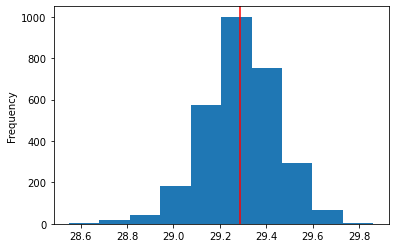

In [46]:
#Plot median line of values
weather.loc[weather['StnPressure'] != 'M','StnPressure'].astype(float).plot(kind='hist');

plt.axvline(x=weather.loc[weather['StnPressure'] != 'M','StnPressure'].astype(float).mean(), c='r')

weather.loc[weather['StnPressure'] != 'M','StnPressure'].astype(float).mean()

# Impute 29.28 for missing Values in Stn Pressure
weather['StnPressure'] = weather.apply(lambda x: '29.28' if x['StnPressure']=='M' else x['StnPressure'], axis=1)

# Convert to float
weather['StnPressure'] = weather['StnPressure'].astype(float)


#### Missing Values for SeaLevel Pressure

29.968129471890993

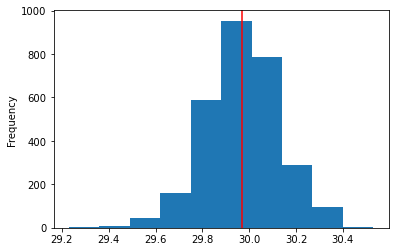

In [47]:
#Plot median line of values
weather.loc[weather['SeaLevel'] != 'M','SeaLevel'].astype(float).plot(kind='hist');

plt.axvline(x=weather.loc[weather['SeaLevel'] != 'M','SeaLevel'].astype(float).mean(), c='r')

weather.loc[weather['SeaLevel'] != 'M','SeaLevel'].astype(float).mean()

In [48]:
# Impute 29.97 for missing Values in Sea level Pressure
weather['SeaLevel'] = weather.apply(lambda x: '29.97' if x['SeaLevel']=='M' else x['SeaLevel'], axis=1)

# Convert to float
weather['SeaLevel'] = weather['SeaLevel'].astype(float)

,SeaLevel,StnPressure
SeaLevel,1.000000,0.967306
StnPressure,0.967306,1.000000


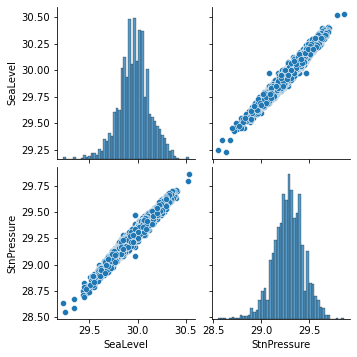

In [75]:
# Correlation between StnPressure and SeaLevel

sns.pairplot(weather[['SeaLevel','StnPressure']]);

weather[['SeaLevel','StnPressure']].corr()

In [76]:
# Drop SeaLevel Pressure
weather.drop(columns='SeaLevel',axis=1, inplace=True)

## EDA on Wind

According to [study](https://underc.nd.edu/assets/216551/fullsize/mcreynolds2003.pdf)
 * Among the variables studied, the ones deemed most relevant to mosquito ability to breed and feed were temperature, wind speed, and daily rainfall.

In [65]:
# Correlation between ResultSpeed and Avg Speed
weather.loc[weather['AvgSpeed']!='M',['ResultSpeed','AvgSpeed']].astype(float).corr()

,ResultSpeed,AvgSpeed
ResultSpeed,1.000000,0.909773
AvgSpeed,0.909773,1.000000


In [66]:
# Compare the values
weather.loc[weather['AvgSpeed']!='M',['ResultSpeed','AvgSpeed']]

,ResultSpeed,AvgSpeed
0,1.7,9.2
1,2.7,9.6
2,13.0,13.4
3,13.3,13.4
4,11.7,11.9
...,...,...
2939,8.5,9.0
2940,5.1,5.5
2941,5.9,6.5
2942,22.6,22.9


In [67]:
# Impute the missing values for AvgSpeed with ResultSpeed
weather['AvgSpeed'] = weather.apply(lambda x: x['ResultSpeed'] if x['AvgSpeed']=='M' else x['AvgSpeed'],axis=1)

# Change to float type
weather['AvgSpeed'] = weather['AvgSpeed'].astype(float)

In [68]:
# Drop ResultSpeed and ResultDir
weather.drop(columns=['ResultSpeed','ResultDir'], axis=1, inplace=True)

## EDA for each variable

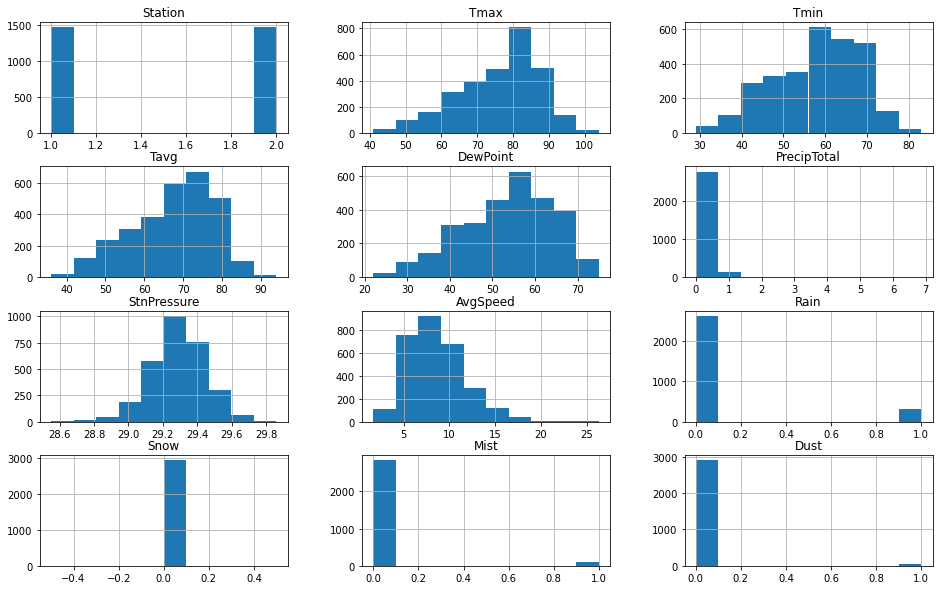

In [79]:
weather.hist(figsize=(16,10));

In [84]:
weather['Snow'].value_counts()

0    2944
Name: Snow, dtype: int64

In [87]:
weather['Rain'].value_counts()

0    2630
1     314
Name: Rain, dtype: int64

In [88]:
weather.drop(columns='Snow',axis=1,inplace=True)

## EDA on Stations

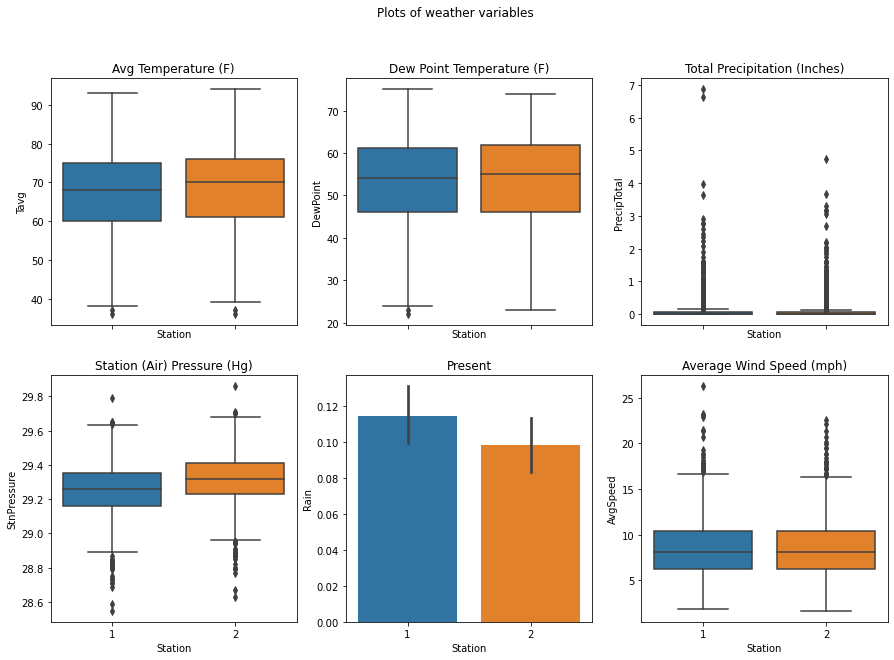

In [91]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15,10))
fig.suptitle('Plots of weather variables')

axes[0,0].set_title('Avg Temperature (F)')
sns.boxplot(y="Tavg", x="Station", data=weather, ax=axes[0,0])

axes[0,1].set_title('Dew Point Temperature (F)')
sns.boxplot(y="DewPoint", x="Station", data=weather, ax=axes[0,1])

axes[0,2].set_title('Total Precipitation (Inches)')
sns.boxplot(y="PrecipTotal", x="Station", data=weather, ax=axes[0,2])

axes[1,0].set_title('Station (Air) Pressure (Hg)')
sns.boxplot(y="StnPressure", x="Station", data=weather, ax=axes[1,0])

axes[1,1].set_title('Present')
sns.barplot(y="Rain", x="Station", data=weather, ax=axes[1,1])

axes[1,2].set_title('Average Wind Speed (mph)')
sns.boxplot(y="AvgSpeed", x="Station", data=weather, ax=axes[1,2]);

In [94]:
weather.head(20)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,StnPressure,AvgSpeed,Rain,Mist,Dust
0,1,2007-05-01,83,50,67,51,0.00,29.10,9.2,0,0,0
1,2,2007-05-01,84,52,68,51,0.00,29.18,9.6,0,0,0
2,1,2007-05-02,59,42,51,42,0.00,29.38,13.4,0,1,0
3,2,2007-05-02,60,43,52,42,0.00,29.44,13.4,0,0,0
4,1,2007-05-03,66,46,56,40,0.00,29.39,11.9,0,0,0
5,2,2007-05-03,67,48,58,40,0.00,29.46,13.2,0,0,1
6,1,2007-05-04,66,49,58,41,0.00,29.31,10.8,1,0,0
7,2,2007-05-04,78,51,64,42,0.00,29.36,10.4,0,0,0
8,1,2007-05-05,66,53,60,38,0.00,29.40,12.0,0,0,0
9,2,2007-05-05,66,54,60,39,0.00,29.46,11.5,0,0,0


In [95]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [96]:
seasons_df=pd.DataFrame()
weather.resample('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   int64         
 5   DewPoint     2944 non-null   int64         
 6   PrecipTotal  2944 non-null   float64       
 7   StnPressure  2944 non-null   float64       
 8   AvgSpeed     2944 non-null   float64       
 9   Rain         2944 non-null   int64         
 10  Mist         2944 non-null   int64         
 11  Dust         2944 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 276.1 KB
